# Analysis of 2D wavelet scattering coefficients on MRI image for feature-based registration
EE 678, Wavelets (Group 22)

### Imports

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from kymatio import Scattering2D
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform

### Loading and Creating Images

(240, 400)
(240, 400)


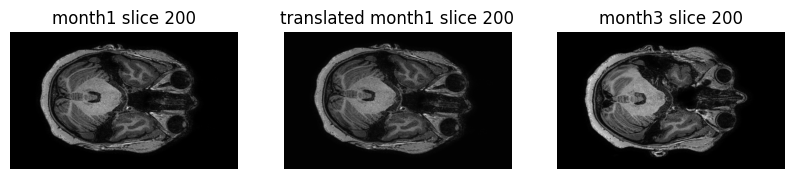

In [34]:
# Load the NIfTI file
month1 = nib.load('anita_1.nii')
month1_data = month1.get_fdata()

month3 = nib.load('anita_3.nii')
month3_data = month3.get_fdata()

# Define the number of slices you want to display
slice_index = month1_data.shape[2] // 2

img1 = month1_data[:,:,slice_index]

# Affine Transform Parameters for 3 degree rotation from the center
angle = np.deg2rad(3)
center = np.array(img1.shape) / 2
affine = np.array([
       [np.cos(angle), -np.sin(angle), center[0] - center[0] * np.cos(angle) + center[1] * np.sin(angle)],
       [np.sin(angle), np.cos(angle), center[1] - center[0] * np.sin(angle) - center[1] * np.cos(angle)]
])

img2 = affine_transform(img1, affine)
print(img1.shape)
print(img2.shape)
img3 = month3_data[:,:,slice_index]

# Create subplots to display multiple slices
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(img1, cmap='gray')
axes[0].set_title(f'month1 slice {slice_index}')
axes[0].axis('off')

axes[1].imshow(img2, cmap='gray')
axes[1].set_title(f'translated month1 slice {slice_index}')
axes[1].axis('off')

axes[2].imshow(img3, cmap='gray')
axes[2].set_title(f'month3 slice {slice_index}')
axes[2].axis('off')
plt.show()


### Setting Parameters

In [16]:
# Set the threshold
threshold = 0.2

# Set the parameters of the scattering transform.
J = 3
M, N = img1.shape 

# Define a Scattering2D object.
S = Scattering2D(J, (M, N))

In [17]:
# Calculate the scattering transform.
S1 = S.scattering(img1)
S2 = S.scattering(img2)
S3 = S.scattering(img3)

## Comparing Slice and its Rotation

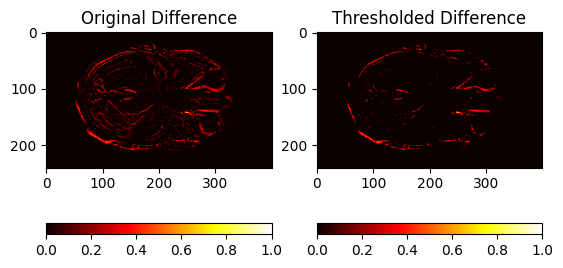

In [18]:
imgDiff = (img1-img2)/np.max([img1,img2])
imgDiff2 = np.where(imgDiff<threshold,0,imgDiff)
plt.figure()
plt.subplot(1,2,1)
plt.title('Original Difference')
plt.imshow(imgDiff, cmap='hot')
plt.clim(0,1)
plt.colorbar(orientation='horizontal')
plt.subplot(1,2,2)
plt.title('Thresholded Difference')
plt.imshow(imgDiff2, cmap='hot')
plt.clim(0,1)
plt.colorbar(orientation='horizontal')

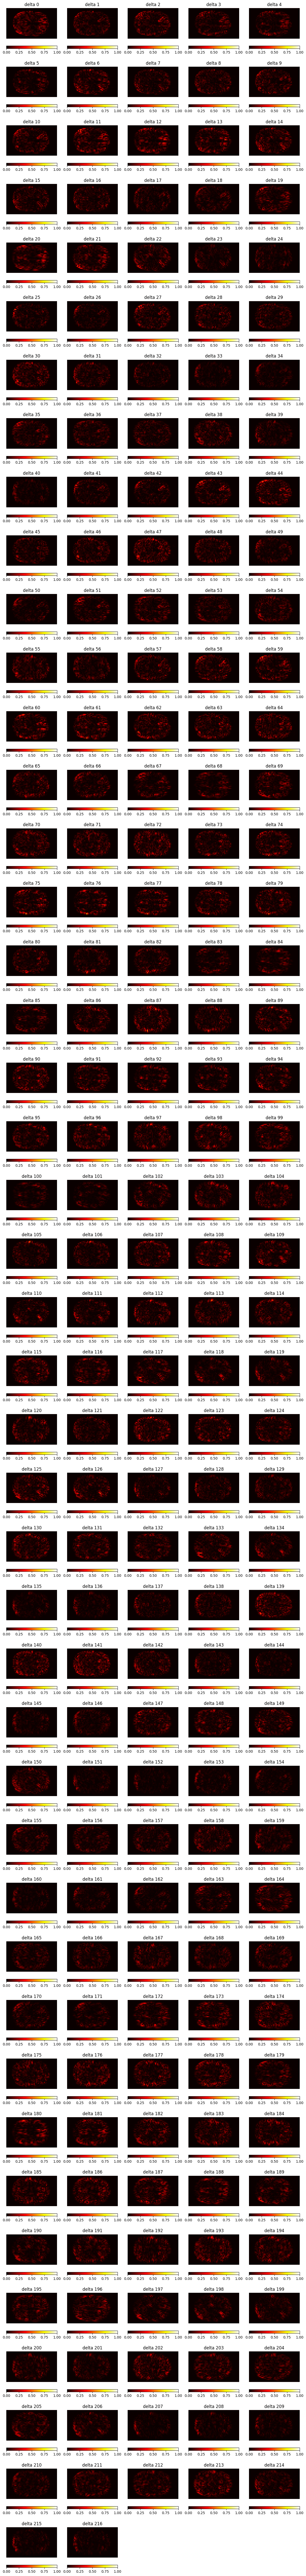

In [19]:
plt.figure(figsize=(15, (S1.shape[0]//5+1)* 3))
maxDiff = 0
for i in range(S1.shape[0]):
    plt.subplot(S1.shape[0]//5+1, 5, i + 1)
    s1 = S1[i, :, :]
    s2 = S2[i, :, :]
    A = np.abs((s1-s2)/np.max([np.max(s1), np.max(s2)]))
    if np.max(A) > maxDiff and i > 0:
        maxDiff = np.max(A)
    im = plt.imshow(np.round(A, 2), cmap='hot', interpolation='nearest')
    plt.title(f'delta {i}')
    plt.clim(0, 1)
    plt.axis('off')
    plt.colorbar(im, orientation='horizontal')  # Add color scale
plt.show()

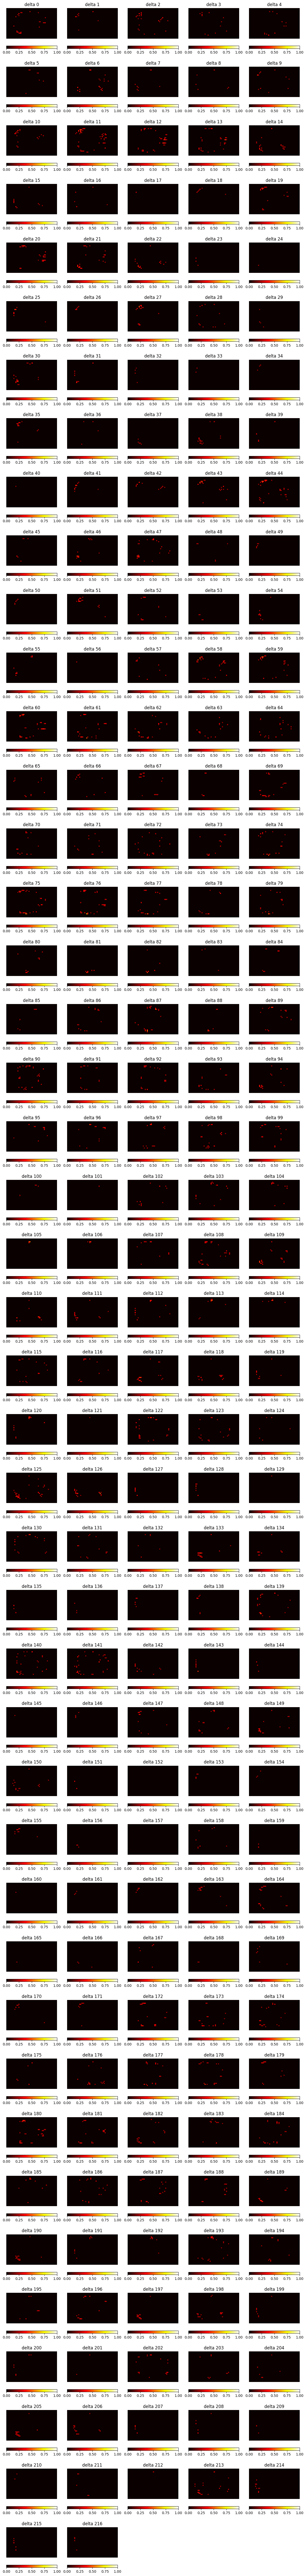

In [20]:
plt.figure(figsize=(15, (S1.shape[0]//5+1)* 3))
for i in range(S1.shape[0]):
    plt.subplot(S1.shape[0]//5+1, 5, i + 1)
    s1 = S1[i, :, :]
    s2 = S2[i, :, :]
    A = np.abs((s1-s2)/np.max([np.max(s1), np.max(s2)]))
    A = np.where(A < threshold, 0, A)
    im = plt.imshow(np.round(A, 2), cmap='hot', interpolation='nearest')
    plt.title(f'delta {i}')
    plt.clim(0, 1)
    plt.axis('off')
    plt.colorbar(im, orientation='horizontal')  # Add color scale
plt.show()

## Analysis of Frobenius Norm
$||A||_F = [\sum_{i,j} abs(a_{i,j})^2]^{1/2}$

We are analysing average norm of features. Division by max-pixel values to normalize the data between 0 and 1
1. $$ ||\frac{img1-img2}{max\_pixel(img1,img2)}||_F$$
2. and, $$ \frac{1}{\textrm{no of scattering coeffs}}\cdot \sum_i||\frac{S1_i-S2_i}{max\_pixel(S1_i,S2_i\ ;\ \forall i)}||_F$$

where $S1_i$ and $S2_i$ are scattering coefficients of img1 and img2 of index $i$.

In [49]:
print("Normalized Frobenius Norm of Diff of Images:")
print(np.linalg.norm((img1-img2)/np.max([np.max(img1), np.max(img2)])))
print("Normalized Avg Frobenius Norm of Diff of Wavelet Scattering Coefficients:")
print(np.linalg.norm((S1-S2)/np.max([np.max(S1), np.max(S2)]))/S1.shape[0])

Normalized Frobenius Norm of Diff of Images:
25.26989568836008
Normalized Avg Frobenius Norm of Diff of Wavelet Scattering Coefficients:
0.011821425211706533


# Comparing Slice of month 1 and month 3 

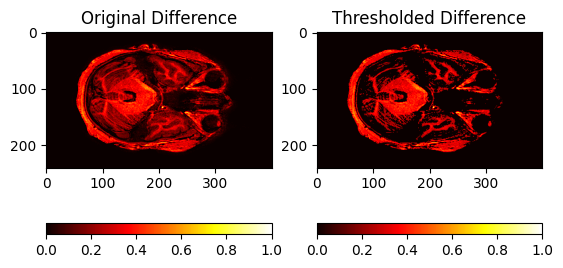

In [43]:
imgDiff_month = (img1-img3)/np.max([img1,img3])
imgDiff_month2 = np.where(imgDiff_month<threshold,0,imgDiff_month)
plt.figure()
plt.subplot(1,2,1)
plt.title('Original Difference')
plt.imshow(imgDiff_month, cmap='hot')
plt.clim(0,1)
plt.colorbar(orientation='horizontal')
plt.subplot(1,2,2)
plt.title('Thresholded Difference')
plt.imshow(imgDiff_month2, cmap='hot')
plt.clim(0,1)
plt.colorbar(orientation='horizontal')

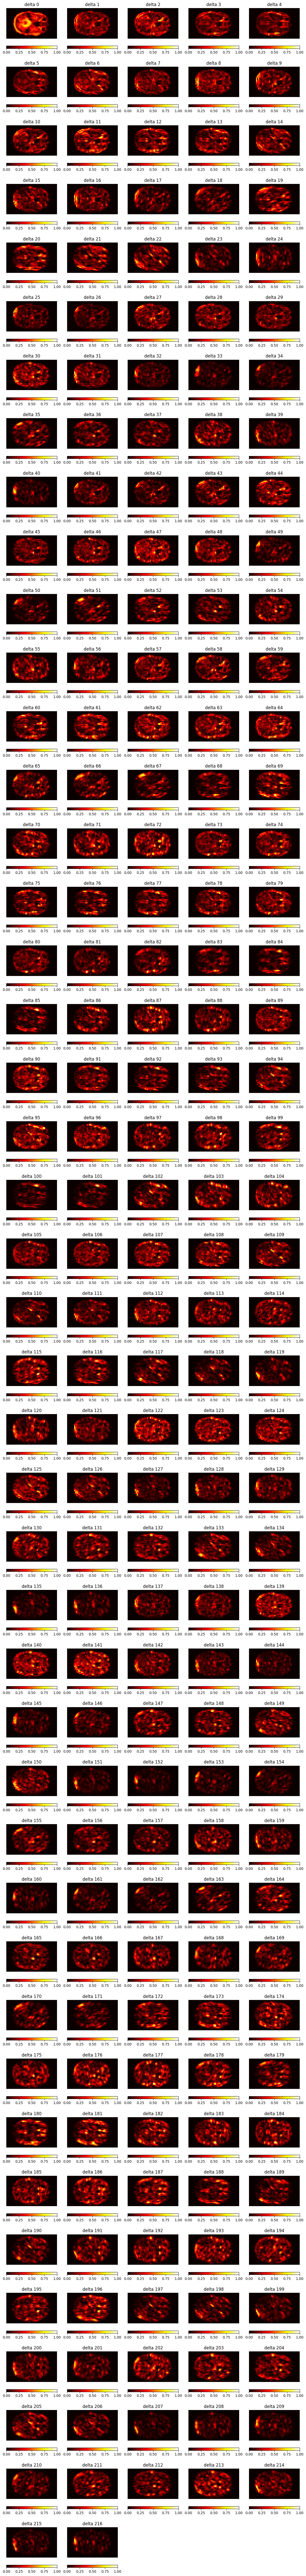

In [46]:
plt.figure(figsize=(15, (S1.shape[0]//5+1)* 3))
maxDiff_month = 0
for i in range(S1.shape[0]):
    plt.subplot(S1.shape[0]//5+1, 5, i + 1)
    s1 = S1[i, :, :]
    s3 = S3[i, :, :]
    A = np.abs((s1-s3)/np.max([np.max(s1), np.max(s3)]))
    if np.max(A) > maxDiff and i > 0:
        maxDiff_month = np.max(A)
    im = plt.imshow(A, cmap='hot', interpolation='nearest')
    plt.title(f'delta {i}')
    plt.clim(0, 1)
    plt.axis('off')
    plt.colorbar(im, orientation='horizontal')  # Add color scale
plt.show()

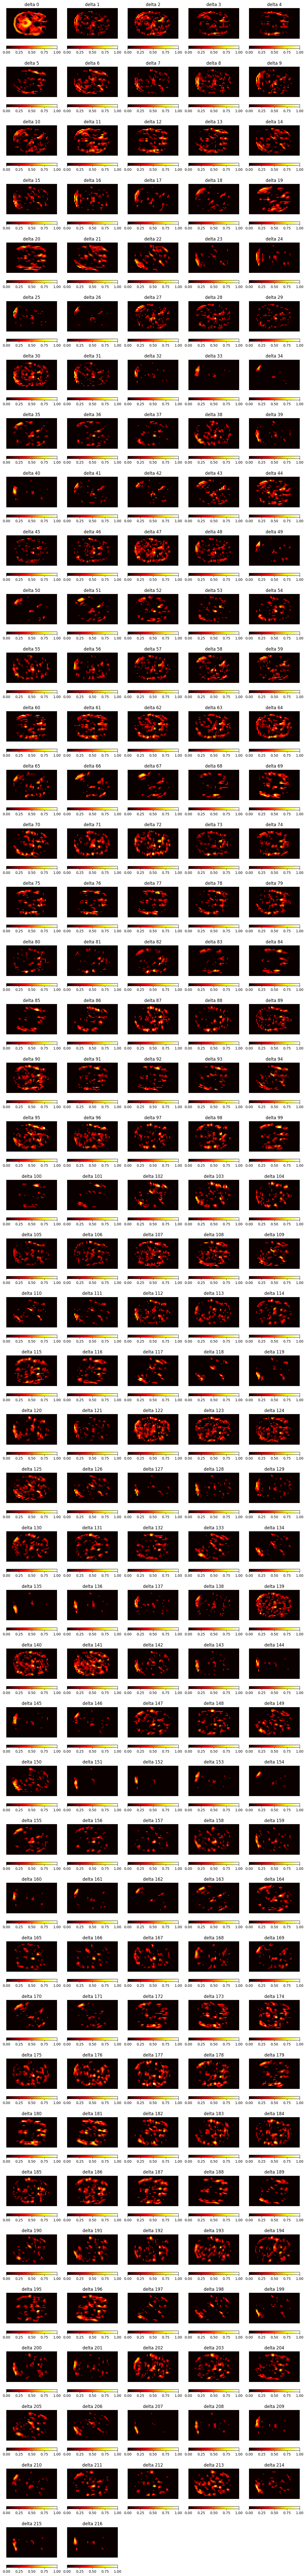

In [47]:
plt.figure(figsize=(15, (S1.shape[0]//5+1)* 3))
for i in range(S1.shape[0]):
    plt.subplot(S1.shape[0]//5+1, 5, i + 1)
    s1 = S1[i, :, :]
    s3 = S3[i, :, :]
    A = np.abs((s1-s3)/np.max([np.max(s1), np.max(s3)]))
    A = np.where(A < threshold, 0, A)
    im = plt.imshow(A , cmap='hot', interpolation='nearest')
    plt.title(f'delta {i}')
    plt.clim(0, 1)
    plt.axis('off')
    plt.colorbar(im, orientation='horizontal')  # Add color scale
plt.show()

## Analysis of Frobenius Norm
$||A||_F = [\sum_{i,j} abs(a_{i,j})^2]^{1/2}$

We are analysing average norm of features. Division by max-pixel values to normalize the data between 0 and 1
1. $$ ||\frac{img1-img3}{max\_pixel(img1,img3)}||_F$$
2. and, $$ \frac{1}{\textrm{no of scattering coeffs}}\cdot \sum_i||\frac{S1_i-S3_i}{max\_pixel(S1_i,S3_i\ ;\ \forall i)}||_F$$

where $S1_i$ and $S3_i$ are scattering coefficients of img1 and img3 of index $i$.

In [48]:
print("Normalized Frobenius Norm of Diff of Images:")
print(np.linalg.norm((img1-img3)/np.max([np.max(img1), np.max(img3)])))
print("Normalized Frobenius Norm of Diff of Wavelet Scattering Coefficients:")
print(np.linalg.norm((S1-S3)/np.max([np.max(S1), np.max(S3)]))/S1.shape[0])

Normalized Frobenius Norm of Diff of Images:
47.95408609647277
Normalized Frobenius Norm of Diff of Wavelet Scattering Coefficients:
0.04458898461491728
